In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In [53]:
df_csv=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df_csv.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [54]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [55]:
df_csv.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [56]:
df_csv.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [57]:
df_csv["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [58]:
df_csv.groupby("Region.1").size()

Region.1
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

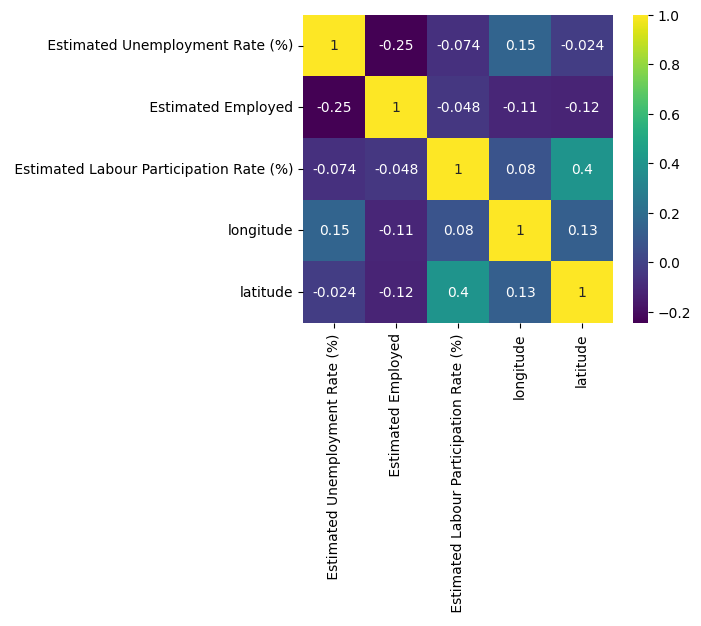

In [59]:
df_csv_maps = df_csv[[df_csv.columns[3],df_csv.columns[4],df_csv.columns[5],df_csv.columns[7],df_csv.columns[8]]]

df_heat_map = df_csv_maps.corr()

plt.figure(figsize=(5,4))

sb.heatmap(df_heat_map, annot=True,cmap='viridis');

<Axes: title={'center': 'Unemployment Rate based on Region.1'}, xlabel='Region.1', ylabel='count'>

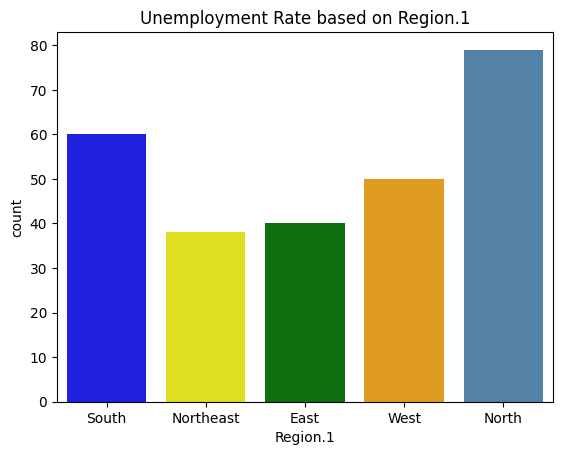

In [60]:
plt.title('Unemployment Rate based on Region.1')
sb.countplot(x='Region.1',data=df_csv,palette=['blue','yellow','green','orange','steelblue'])

<Axes: title={'center': 'Unemployment Rate based on Region'}, xlabel='EUR', ylabel='State'>

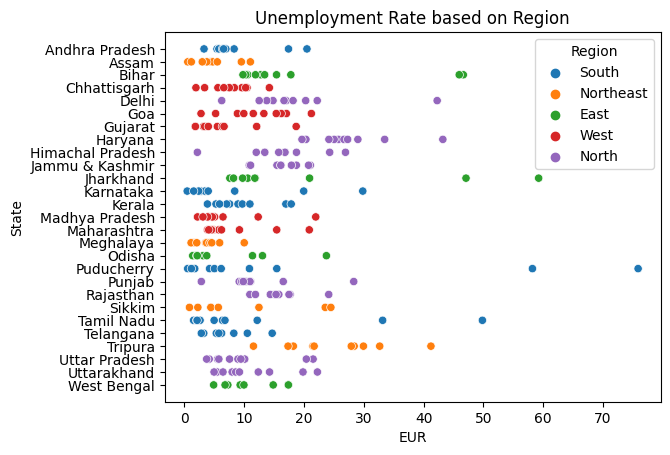

In [61]:
df_csv.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]

plt.title('Unemployment Rate based on Region')
sb.scatterplot(y=df_csv['State'],x=df_csv['EUR'],hue=df_csv['Region'])

In [62]:
import plotly.express as pe

In [63]:
plt1 = pe.bar(df_csv,x='State',y='EUR',color='Region',title='Unemployment rate',animation_frame='Date',template='plotly_dark')
plt1.update_layout(xaxis={'categoryorder':'total descending'})
plt1.show()

In [64]:
state_colors = pe.colors.qualitative.Set3[:len(df_csv['State'].unique())]

fig = pe.treemap(df_csv, path=['Region', 'State'], values='EUR',
                  title='Unemployment Rate in Every State and Region', height=650, template='plotly_dark',
                  color='State', color_discrete_sequence=state_colors)
fig.show()